# Outliers miniproject

Sebastian described to us an algorithm for improving a regression, which you will implement in this project. You will work through it in the next few quizzes. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.


## Function outlier cleaner

In [101]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    
    for i in range(len(predictions)):
        cleaned_data.append((ages[i][0], net_worths[i][0], abs(predictions[i][0] - net_worths[i][0])))
    
    cleaned_data = sorted(cleaned_data, key = lambda x: x[2])
    
    # Only returns 90% of data ()
    return cleaned_data[:int(0.9*len(predictions))]

## Function outlier_removal_regression (main)

slope: [[5.07793064]]
intercept: [25.21002155]
r-squared score (training data): 0.4898725961751499
r-squared score (testing data): 0.8782624703664675


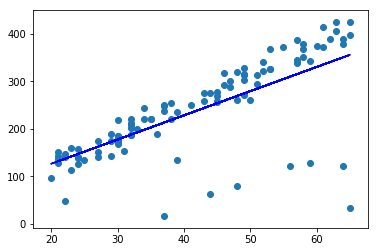

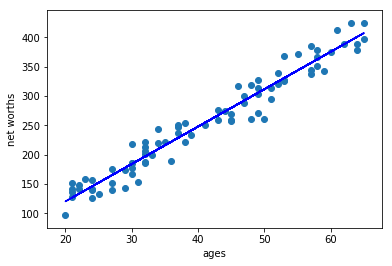

New slope: [[6.36859481]]
New intercept: [-6.91861069]
New r-squared score (training data): 0.40932545447778546
New r-squared score (testing data): 0.983189455395532


In [102]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

# Slope and intercept:
print "slope:", reg.coef_
print "intercept:", reg.intercept_

#Score
print "r-squared score (training data):", reg.score(ages_train, net_worths_train)
print "r-squared score (testing data):", reg.score(ages_test, net_worths_test)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

    # Slope and intercept:
    print "New slope:", reg.coef_
    print "New intercept:", reg.intercept_

    #Score
    print "New r-squared score (training data):", reg.score(ages_train, net_worths_train)
    print "New r-squared score (testing data):", reg.score(ages_test, net_worths_test)


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

## Enron outliers

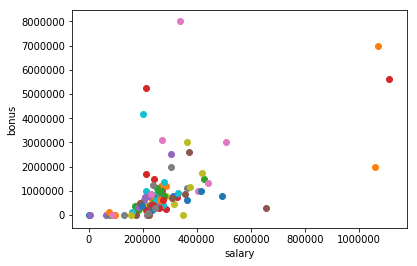

In [120]:
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

# For removing key 'TOTAL'... 
data_dict.pop( 'TOTAL', 0 )

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

# Using data array to create a scatter plot
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()


In [121]:
# What is the dictionary Key for the biggest Enron outlier..?
# Value of x and y for outlier[2.6704229e+07 9.7343619e+07]
for dat in data_dict:
    if data_dict[dat]['salary'] == 2.6704229e+07:
        print dat  #**--> RETURNS 'TOTAL'

In [128]:
#After removing the 'TOTAL' outlier we still can see 4 outliers, that have salary of more than a million dollars...
# what are its dictionary keys?
for dat in data_dict:
    if type(data_dict[dat]['salary']) is int and type(data_dict[dat]['bonus']) is int and ( data_dict[dat]['salary'] > 1000000 or data_dict[dat]['bonus'] > 5000000):
        print dat  #**--> RETURNS 'TOTAL'
        print data_dict[dat]['salary']

LAVORATO JOHN J
339288
LAY KENNETH L
1072321
BELDEN TIMOTHY N
213999
SKILLING JEFFREY K
1111258
FREVERT MARK A
1060932
